In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/Viral_Social_Media_Trends.csv')

In [3]:
df.columns

Index(['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'Views',
       'Likes', 'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [5]:
df.isna().sum()

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64

In [6]:
# checking for duplicate Post_ID
df.duplicated(subset='Post_ID').sum()

np.int64(0)

In [7]:
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [8]:
platforms = df['Platform'].unique()
hashtags = df['Hashtag'].unique()
content_types = df['Content_Type'].unique()
regions = df['Region'].unique()
engagement_levels = df['Engagement_Level'].unique()

print("Platforms: ", platforms)
print("Hashtags: ", hashtags)
print("Content Types: ", content_types)
print("Regions: ", regions)
print("Engagement Levels: ", engagement_levels)

Platforms:  ['TikTok' 'Instagram' 'Twitter' 'YouTube']
Hashtags:  ['#Challenge' '#Education' '#Dance' '#Comedy' '#Gaming' '#Music' '#Viral'
 '#Fitness' '#Tech' '#Fashion']
Content Types:  ['Video' 'Shorts' 'Post' 'Tweet' 'Live Stream' 'Reel']
Regions:  ['UK' 'India' 'Brazil' 'Australia' 'Japan' 'Germany' 'Canada' 'USA']
Engagement Levels:  ['High' 'Medium' 'Low']


In [9]:
df.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


In [10]:
# common hashtags
common_hashtags = df.groupby('Hashtag')['Hashtag'].count().sort_values(ascending=False)

print("Most common hashtags")
print(common_hashtags)

Most common hashtags
Hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
#Music        493
#Tech         491
#Fashion      487
#Viral        481
#Gaming       479
Name: Hashtag, dtype: int64


In [11]:
# post volume per platform
posts_per_platform = df.groupby('Platform')['Post_ID'].count().sort_values(ascending=False)

# post volume per platform
posts_per_content_type =df.groupby('Content_Type')['Post_ID'].count().sort_values(ascending=False)

print("Posts per Platform")
print(posts_per_platform, "\n")
print("Posts per Content Type")
print(posts_per_content_type)

Posts per Platform
Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: Post_ID, dtype: int64 

Posts per Content Type
Content_Type
Live Stream    855
Post           853
Reel           841
Tweet          836
Video          828
Shorts         787
Name: Post_ID, dtype: int64


## Derived Metrics

In [12]:
df['Engagement_Rate'] = ((df['Likes'] + df['Comments']) / df['Views']) * 100
df['Virality_Score'] = (df['Shares'] / df['Views']) * 100
df['Like_to_Share_Ratio'] = (df['Likes'] / df['Shares']) * 100
df['Comments_to_Likes'] = (df['Comments'] / df['Likes']) * 100

df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Engagement_Rate,Virality_Score,Like_to_Share_Ratio,Comments_to_Likes
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High,8.617272,1.276221,638.808695,5.699538
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium,5.834516,1.584720,326.814455,12.655176
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium,9.911214,1.075306,829.827766,11.072528
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low,17.858361,1.273162,1087.747069,28.952606
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium,274.006413,107.268831,246.275564,3.720800


## Univariate Analysis

### Histograms

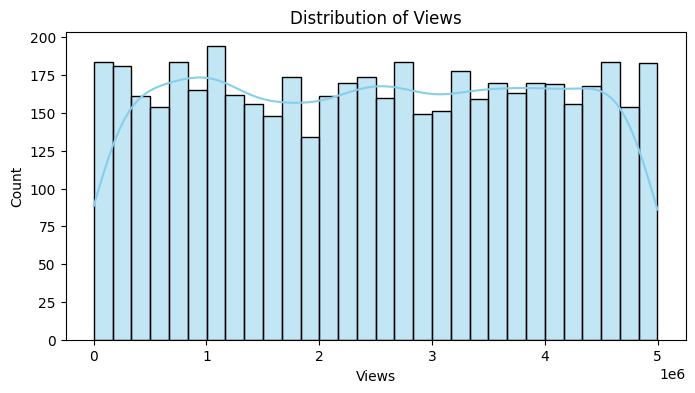

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Views', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Count')
plt.show()

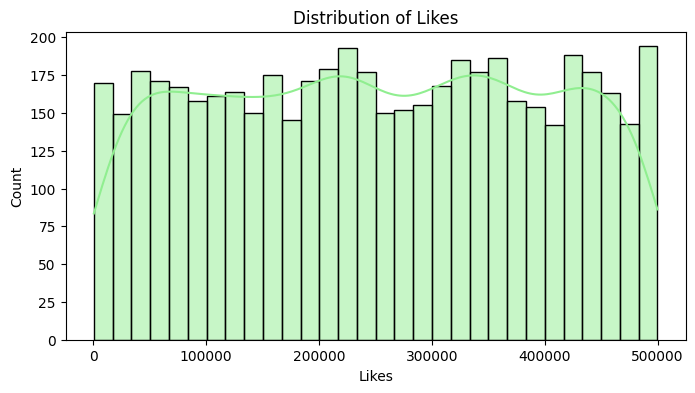

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Likes', kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Count')
plt.show()

In [15]:
# removing skewness of column 'Engagement_Rate'
df['Engagement_Rate'] = np.log1p(df['Engagement_Rate'])

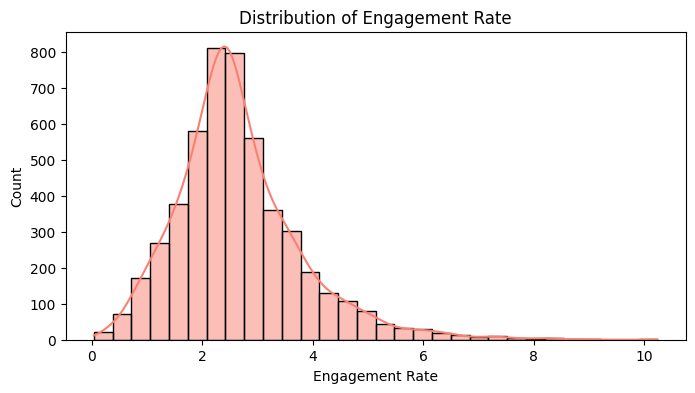

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Engagement_Rate', kde=True, bins=30, color='salmon')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Count')
plt.show()

### Count Plots

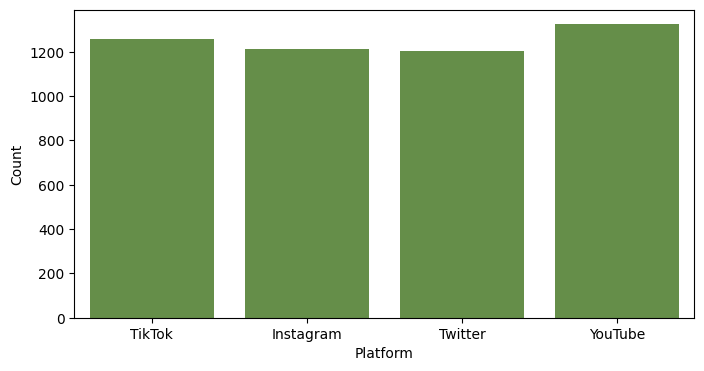

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(df, x='Platform', color="#63993D")
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

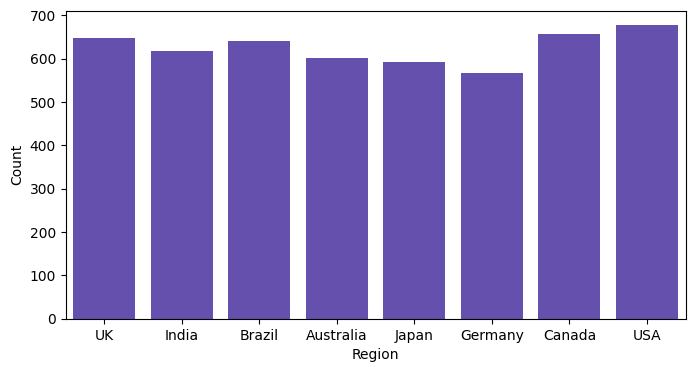

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(df, x='Region', color="#5E40BE")
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

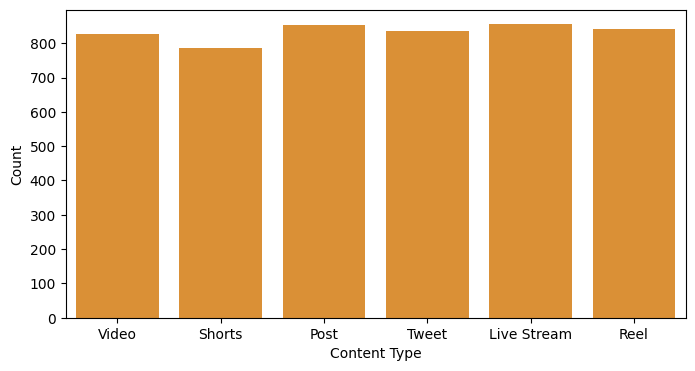

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(df, x='Content_Type', color="#F5921B")
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

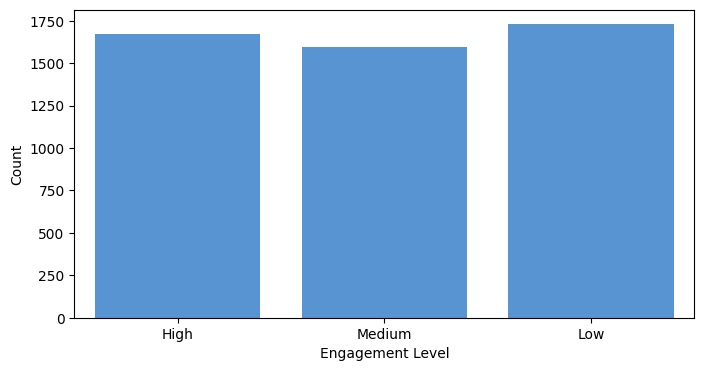

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(df, x='Engagement_Level', color="#4394E5")
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()

## Analysis

### Hashtag Analysis

In [21]:
top_ten_hashtags = df.groupby('Hashtag')['Post_ID'].count().sort_values(ascending=False).head(10)
top_ten_hashtags

Hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
#Music        493
#Tech         491
#Fashion      487
#Viral        481
#Gaming       479
Name: Post_ID, dtype: int64

In [22]:
avg_engagement_per_hashtag = round(df.groupby('Hashtag')['Engagement_Rate'].mean().sort_values(ascending=False), 2)
avg_engagement_per_hashtag

Hashtag
#Tech         2.70
#Dance        2.70
#Comedy       2.68
#Viral        2.66
#Education    2.66
#Fashion      2.65
#Gaming       2.63
#Challenge    2.61
#Fitness      2.60
#Music        2.60
Name: Engagement_Rate, dtype: float64

In [23]:
virality_per_hashtag = round(df.groupby('Hashtag')['Virality_Score'].mean().sort_values(ascending=False), 2)
virality_per_hashtag

Hashtag
#Comedy       10.98
#Gaming       10.72
#Education     8.13
#Tech          8.02
#Fitness       7.84
#Fashion       7.78
#Challenge     7.40
#Dance         7.24
#Viral         7.17
#Music         5.27
Name: Virality_Score, dtype: float64

### Regional Patterns

In [24]:
views_by_region = df.groupby('Region')['Views'].sum().reset_index()
likes_by_region = df.groupby('Region')['Likes'].sum().reset_index()
avg_engagement_rate_by_region = df.groupby('Region')['Engagement_Rate'].mean().reset_index()

stats_by_region = views_by_region.merge(likes_by_region, on='Region').merge(avg_engagement_rate_by_region, on='Region')

columns = ['Region', 'Views', 'Likes', 'Average Engagement Rate %']
stats_by_region.columns = columns

stats_by_region['Views'] = stats_by_region['Views'].map('{:,d}'.format)
stats_by_region['Likes'] = stats_by_region['Likes'].map('{:,d}'.format)
stats_by_region['Average Engagement Rate %'] = round(stats_by_region['Average Engagement Rate %'], 2)

stats_by_region

,Region,Views,Likes,Average Engagement Rate %
0,Australia,"1,462,197,447","153,140,456",2.69
1,Brazil,"1,639,502,227","158,980,662",2.64
2,Canada,"1,607,786,982","168,585,301",2.72
3,Germany,"1,441,300,699","138,283,644",2.57
4,India,"1,513,372,283","154,827,086",2.67
5,Japan,"1,430,193,320","151,895,861",2.69
6,UK,"1,619,027,523","164,351,194",2.64
7,USA,"1,756,951,739","167,310,945",2.56


In [25]:
engagement_per_region = df.query("Engagement_Level == 'High'").groupby('Region')['Engagement_Level'].count().sort_values(ascending=False).reset_index()
engagement_per_region.columns = ['Region', 'High_Engagement_Posts']

engagement_per_region

,Region,High_Engagement_Posts
0,USA,236
1,Brazil,215
2,UK,215
3,India,209
4,Canada,202
5,Japan,201
6,Germany,198
7,Australia,197


In [26]:
content_performance_per_region = df.groupby(['Region', 'Content_Type']).agg({'Views': 'sum'}).map('{:,d}'.format).reset_index()
platform_performance_per_region = df.groupby(['Region', 'Platform']).agg({'Views': 'sum'}).map('{:,d}'.format).reset_index()

content_performance_per_region.head()

,Region,Content_Type,Views
0,Australia,Live Stream,"231,392,199"
1,Australia,Post,"202,249,731"
2,Australia,Reel,"293,944,261"
3,Australia,Shorts,"237,350,171"
4,Australia,Tweet,"240,029,620"


### Content Type Analysis

In [27]:
likes_per_content_type = df.groupby('Content_Type')['Likes'].sum().map('{:,d}'.format).reset_index()
shares_per_content_type = df.groupby('Content_Type')['Shares'].sum().map('{:,d}'.format).reset_index()
comments_per_content_type = df.groupby('Content_Type')['Comments'].sum().map('{:,d}'.format).reset_index()

stats_per_content_type = likes_per_content_type.merge(shares_per_content_type, on='Content_Type')\
                                                .merge(comments_per_content_type, on='Content_Type')

stats_per_content_type = stats_per_content_type.reset_index(drop=True)

stats_per_content_type

,Content_Type,Likes,Shares,Comments
0,Live Stream,"212,733,932","42,683,276","21,518,328"
1,Post,"215,624,901","42,790,061","20,945,388"
2,Reel,"214,464,309","43,191,967","21,212,884"
3,Shorts,"195,117,921","39,030,442","19,722,544"
4,Tweet,"208,485,417","42,993,352","20,595,684"
5,Video,"210,948,669","41,908,712","20,447,141"


In [28]:
most_likes_content_type = stats_per_content_type.loc[stats_per_content_type['Likes'] == stats_per_content_type['Likes'].max()]
most_shares_content_type = stats_per_content_type.loc[stats_per_content_type['Shares'] == stats_per_content_type['Shares'].max()]
most_comments_content_type = stats_per_content_type.loc[stats_per_content_type['Comments'] == stats_per_content_type['Comments'].max()]

print(f"Most Likes: {most_likes_content_type['Content_Type'].values[0]}")
print(f"Most Shares: {most_shares_content_type['Content_Type'].values[0]}")
print(f"Most Comments: {most_comments_content_type['Content_Type'].values[0]}")

Most Likes: Post
Most Shares: Reel
Most Comments: Live Stream


In [29]:
engagement_rate_per_content_type = df.groupby('Content_Type')['Engagement_Rate'].mean().sort_values(ascending=False).reset_index()
engagement_rate_per_content_type

,Content_Type,Engagement_Rate
0,Video,2.691512
1,Post,2.653773
2,Live Stream,2.651328
3,Reel,2.648076
4,Shorts,2.624454
5,Tweet,2.613660


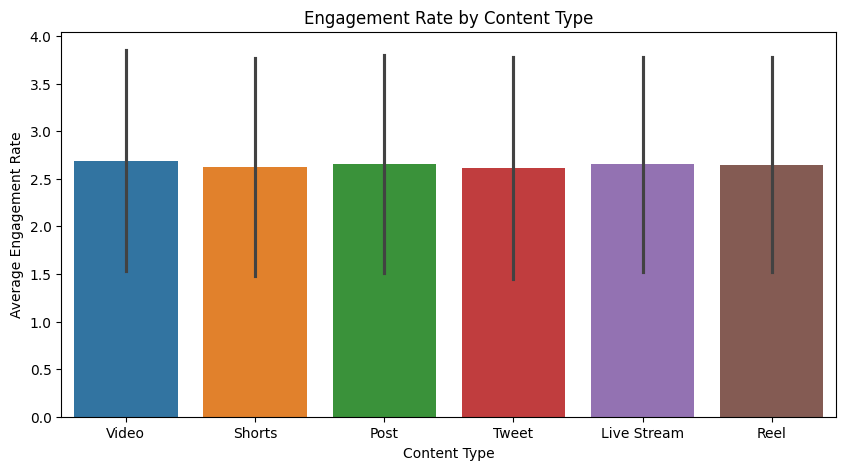

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Content_Type', y='Engagement_Rate', errorbar='sd', hue='Content_Type')
plt.title('Engagement Rate by Content Type')
plt.ylabel('Average Engagement Rate')
plt.xlabel('Content Type')
plt.show()

## Feature Engineering

In [31]:
dim_hashtag = df[['Hashtag']].drop_duplicates().reset_index(drop=True)
dim_hashtag['Hashtag_ID'] = dim_hashtag.index
dim_hashtag = dim_hashtag[['Hashtag_ID', 'Hashtag']]

dim_hashtag

,Hashtag_ID,Hashtag
0,0,#Challenge
1,1,#Education
2,2,#Dance
3,3,#Comedy
4,4,#Gaming
5,5,#Music
6,6,#Viral
7,7,#Fitness
8,8,#Tech
9,9,#Fashion


In [32]:
dim_region = df[['Region']].drop_duplicates().reset_index(drop=True)
dim_region['Region_ID'] = dim_region.index
dim_region = dim_region[['Region_ID', 'Region']]

dim_region

,Region_ID,Region
0,0,UK
1,1,India
2,2,Brazil
3,3,Australia
4,4,Japan
5,5,Germany
6,6,Canada
7,7,USA


In [33]:
dim_platform = df[['Platform']].drop_duplicates().reset_index(drop=True)
dim_platform['Platform_ID'] = dim_platform.index
dim_platform = dim_platform[['Platform_ID', 'Platform']]

dim_platform

,Platform_ID,Platform
0,0,TikTok
1,1,Instagram
2,2,Twitter
3,3,YouTube


In [34]:
dim_content_type = df[['Content_Type']].drop_duplicates().reset_index(drop=True)
dim_content_type['Content_Type_ID'] = dim_content_type.index
dim_content_type = dim_content_type[['Content_Type_ID', 'Content_Type']]

dim_content_type

,Content_Type_ID,Content_Type
0,0,Video
1,1,Shorts
2,2,Post
3,3,Tweet
4,4,Live Stream
5,5,Reel


In [35]:
new_df = df.merge(dim_hashtag, on='Hashtag')\
            .merge(dim_region, on='Region')\
            .merge(dim_platform, on='Platform')\
            .merge(dim_content_type, on='Content_Type')\
            [['Post_ID', 'Hashtag_ID', 'Region_ID', 'Platform_ID', 'Content_Type_ID',\
              'Platform', 'Hashtag', 'Content_Type', 'Region', 'Views',\
              'Likes', 'Shares', 'Comments', 'Engagement_Level', 'Engagement_Rate',\
              'Virality_Score', 'Like_to_Share_Ratio', 'Comments_to_Likes']]

new_df

,Post_ID,Hashtag_ID,Region_ID,Platform_ID,Content_Type_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Engagement_Rate,Virality_Score,Like_to_Share_Ratio,Comments_to_Likes
0,Post_1,0,0,0,0,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High,2.263561,1.276221,638.808695,5.699538
1,Post_2,1,1,1,1,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium,1.921986,1.584720,326.814455,12.655176
2,Post_3,0,2,2,0,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium,2.389791,1.075306,829.827766,11.072528
3,Post_4,1,3,3,1,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low,2.936956,1.273162,1087.747069,28.952606
4,Post_5,2,2,0,2,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium,5.616794,107.268831,246.275564,3.720800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Post_4996,1,4,3,0,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High,2.309470,1.390458,644.342921,1.225135
4996,Post_4997,1,0,1,0,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium,1.511598,1.132722,303.178279,2.906186
4997,Post_4998,9,7,3,1,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low,1.460254,3.753792,43.069827,104.549242
4998,Post_4999,4,6,1,1,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low,1.618055,0.583076,362.791416,91.139671
